In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import os
os.chdir('D:\Python_csv_files')
df=pd.read_excel("chaljaa.xlsx") 
df.head()

,preg_count,glu_conc,BP,tricep_thickness,insulin,BMI,DPF,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
feature_df = df[['preg_count', 'glu_conc','BP', 'tricep_thickness', 'insulin', 'BMI', 'DPF', 'Age']]
X = np.asarray(feature_df)

In [3]:
feature_df.dtypes

preg_count            int64
glu_conc              int64
tricep_thickness      int64
insulin               int64
BMI                 float64
DPF                 float64
Age                   int64
dtype: object

In [4]:
y = np.asarray(df['class'])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [6]:
DiabetesTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DiabetesTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
DiabetesTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
predTree = DiabetesTree.predict(X_test)

In [9]:
print (predTree [0:5])
print (y_test [0:5])

[0 1 0 1 0]
[0 1 0 1 0]


In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7229437229437229


In [11]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


In [12]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(DiabetesTree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Diabetes_tree")

'Diabetes_tree.pdf'

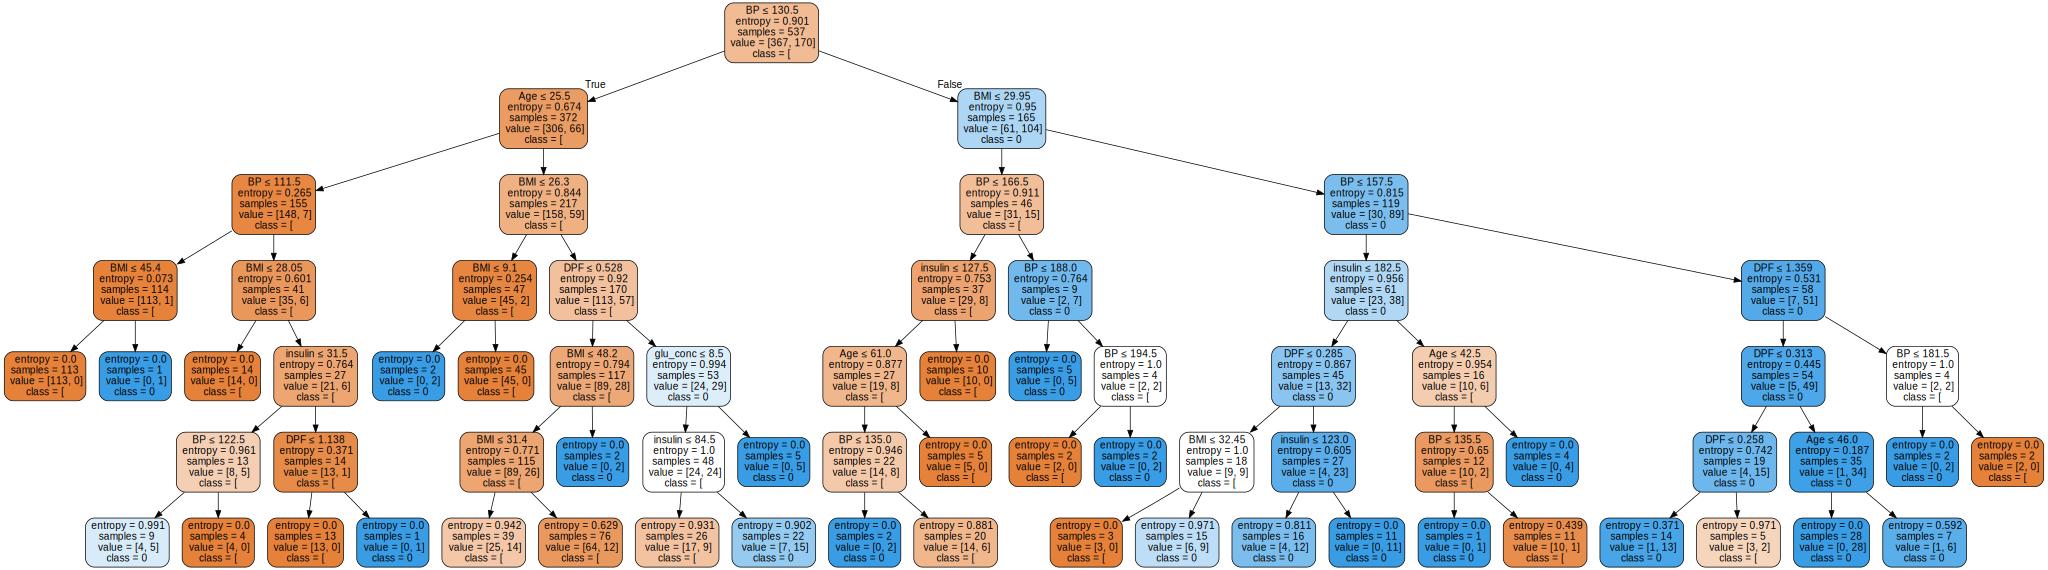

In [13]:
feature_Names = df.columns[1:8]
#feature_Names = [ 'UnifSize', 'UnifShape', 'SingEpiSize', 'BareNuc']
dot_data = tree.export_graphviz(DiabetesTree, out_file=None, 
                     feature_names=feature_Names,  
                     class_names=str(DiabetesTree.classes_),  
                      filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 